# D7058E - Lab Assigment 2

---



## Task 1

### Installing and importing libiries

In [1]:
import warnings
warnings.filterwarnings('default')
warnings.filterwarnings("ignore")

In [2]:
!pip install tensorflow

In [3]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from nltk.translate.bleu_score import corpus_bleu
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.translate.bleu_score import sentence_bleu

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Pre-defined methods

In [4]:
def build_model(optimizer):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=32),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [5]:
def categorize_bleu_score(score):
    if score > 0.75:
        return 'Excellent'
    elif score > 0.5:
        return 'Good'
    elif score > 0.25:
        return 'Fair'
    else:
        return 'Poor'

In [6]:
_weights = {
    'BLEU-1': (1, 0, 0, 0),
    'BLEU-2': (0.5, 0.5, 0, 0),
    'BLEU-3': (0.33, 0.33, 0.33, 0),
    'BLEU-4': (0.25, 0.25, 0.25, 0.25),
}

In [7]:
def compute_confusion_matrix(y_test, y_pred, opt, epoch):
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
  plt.title(f'Confusion Matrix - {opt} with {epoch} epochs')
  plt.show()

In [8]:
def _predict(X_train, y_train, opt, epoch):
    model = build_model(opt)
    model.fit(X_train, y_train, epochs=epoch, verbose=0)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    acc = accuracy_score(y_test, y_pred)
    print(f'Optimizer: {opt}, Epochs: {epoch}, Accuracy: {acc}')
    compute_confusion_matrix(y_test, y_pred, opt, epoch)

In [9]:
df = pd.read_csv('IMDB Dataset.csv', encoding = "ISO-8859-1")
df = df.dropna()
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [11]:
label_mapping = {'positive': 1, 'negative': 0}

In [12]:
labels = np.array([label_mapping[label] for label in df['sentiment']])

In [14]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])
data = tf.keras.preprocessing.sequence.pad_sequences(sequences)

In [16]:
data = np.array(data, dtype=np.float32)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

In [18]:
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [19]:
optimizers = ['adam', 'sgd', 'rmsprop']

In [20]:
epochs = [10, 50, 100]

313/313 [==============================] - 2s 6ms/step
Optimizer: adam, Epochs: 10, Accuracy: 0.9


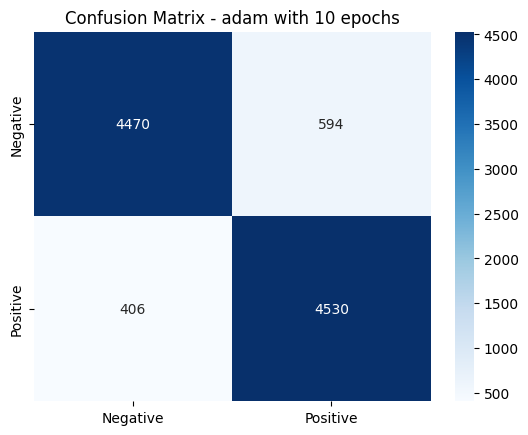

In [44]:
_predict(X_train, y_train, optimizers[0], epochs[0])

313/313 [==============================] - 2s 5ms/step
Optimizer: adam, Epochs: 50, Accuracy: 0.8981


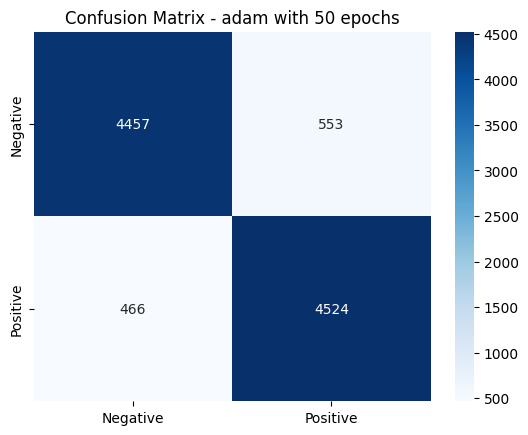

In [21]:
_predict(X_train, y_train, optimizers[0], epochs[1])

313/313 [==============================] - 2s 5ms/step
Optimizer: adam, Epochs: 100, Accuracy: 0.8846


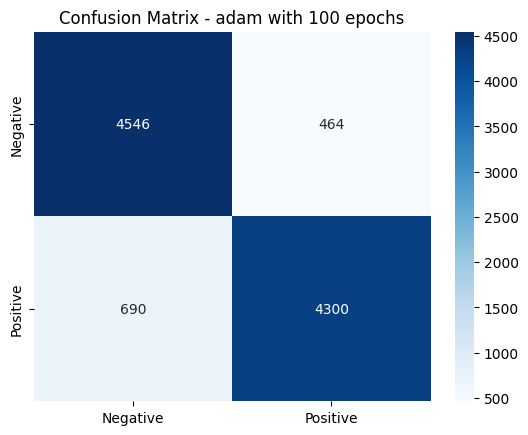

In [22]:
_predict(X_train, y_train, optimizers[0], epochs[2])

313/313 [==============================] - 2s 5ms/step
Optimizer: sgd, Epochs: 10, Accuracy: 0.5013


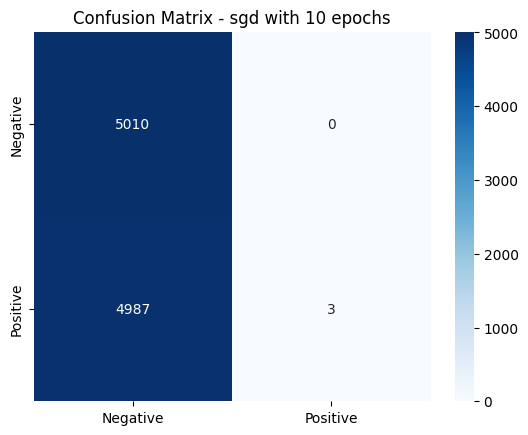

In [23]:
_predict(X_train, y_train, optimizers[1], epochs[0])

313/313 [==============================] - 2s 6ms/step
Optimizer: sgd, Epochs: 50, Accuracy: 0.5149


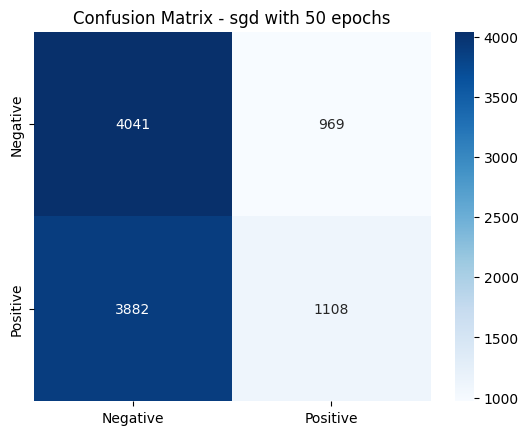

In [24]:
_predict(X_train, y_train, optimizers[1], epochs[1])

313/313 [==============================] - 2s 5ms/step
Optimizer: sgd, Epochs: 100, Accuracy: 0.5113


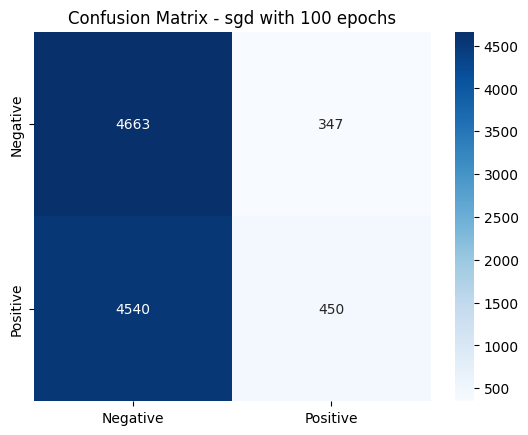

In [25]:
_predict(X_train, y_train, optimizers[1], epochs[2])

313/313 [==============================] - 2s 5ms/step
Optimizer: rmsprop, Epochs: 10, Accuracy: 0.7135


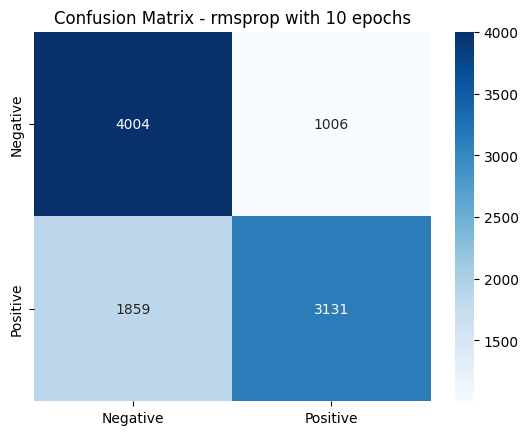

In [26]:
_predict(X_train, y_train, optimizers[2], epochs[0])

313/313 [==============================] - 2s 5ms/step
Optimizer: rmsprop, Epochs: 50, Accuracy: 0.8821


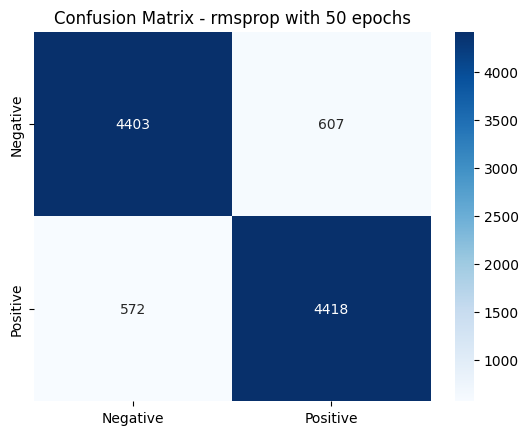

In [27]:
_predict(X_train, y_train, optimizers[2], epochs[1])

313/313 [==============================] - 2s 5ms/step
Optimizer: rmsprop, Epochs: 100, Accuracy: 0.8958


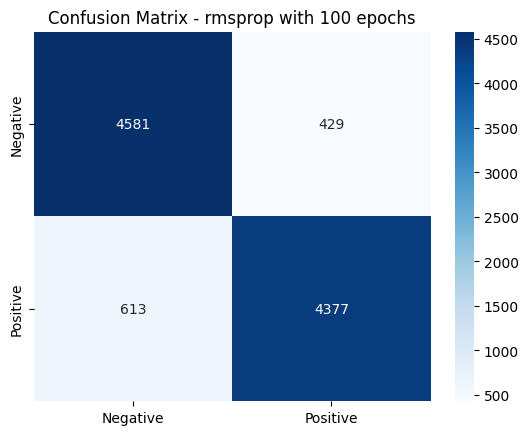

In [28]:
_predict(X_train, y_train, optimizers[2], epochs[2])

## Task2

### Dataset: Threads, an Instagram app Reviews. Ref: https://www.kaggle.com/datasets/saloni1712/threads-an-instagram-app-reviews

In [191]:
df_threads = pd.read_csv('threads_reviews.csv', encoding="ISO-8859-1")
df_threads = df_threads.dropna()
df_threads.head()

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


In [192]:
reference = [word_tokenize(df_threads['review_description'].iloc[0])]

In [193]:
print('Reference:', reference)

Reference: [['Meh', '.', 'Not', 'the', 'greatest', 'experience', 'on', 'a', 'Chromebook', '.', 'Seems', 'to', 'be', 'customized', 'for', 'phones', 'only', '.', 'Opens', 'in', 'a', 'little', 'screen', 'that', 'you', 'ca', "n't", 'expand', 'or', 'resize', '-', 'for', 'reasons', 'that', 'are', 'a', 'complete', 'mystery', 'to', 'me', '.', 'Judging', 'from', 'the', 'fact', 'that', 'every', 'other', 'app', 'I', 'know', 'of', 'is', 'resizeable', ',', 'this', 'seems', 'like', 'it', 'was', 'a', 'conscious', 'choice', 'by', 'the', 'developers', '.', 'Why', 'you', "'d", 'do', 'something', 'like', 'this', 'is', 'beyond', 'understanding', 'and', 'suggests', 'a', 'control', 'freak', 'approach', '.', 'Not', 'a', 'great', 'way', 'to', 'make', 'a', 'first', 'impression', '.']]


In [194]:
for index in range(1, 20):
    candidate = word_tokenize(df_threads['review_description'].iloc[index])
    print('Review:', df_threads['review_description'].iloc[index])
    score = sentence_bleu(reference, candidate)
    category = categorize_bleu_score(score)
    print(f'Review number: {index}, BLEU Score: {score}, Category: {category}', '\n')

Review: Pretty good for a first launch!! Its easy to use and self-explanatory and I'd say the algorithm is good as well. It has great *potential* but a few things need improvement: -the ability to use hashtags would make it easier to find topics and people you'd be interested in -an option for a following-only feed would be a major improvement (especially chronological order) -the ability to choose images from albums rather than recent photos -the ability to save photos to phone
Review number: 1, BLEU Score: 3.9511480011443355e-155, Category: Poor 

Review: For a brand new app, it's very well optimized. However it's just missing quite a few features that apps like Twitter have. There is no way to have your timeline show threads from who you're following. It would also be nice to be able to switch accounts quickly like on Insta. I've also noticed that videos have a hard time playing audio sometimes. Overall, it's a decent first version that I hope will get more features as time goes on.

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [195]:
reference_tokens = [word_tokenize(df_threads['review_description'].iloc[0])]

In [196]:
print('Reference Tokens:', reference_tokens)

Reference Tokens: [['Meh', '.', 'Not', 'the', 'greatest', 'experience', 'on', 'a', 'Chromebook', '.', 'Seems', 'to', 'be', 'customized', 'for', 'phones', 'only', '.', 'Opens', 'in', 'a', 'little', 'screen', 'that', 'you', 'ca', "n't", 'expand', 'or', 'resize', '-', 'for', 'reasons', 'that', 'are', 'a', 'complete', 'mystery', 'to', 'me', '.', 'Judging', 'from', 'the', 'fact', 'that', 'every', 'other', 'app', 'I', 'know', 'of', 'is', 'resizeable', ',', 'this', 'seems', 'like', 'it', 'was', 'a', 'conscious', 'choice', 'by', 'the', 'developers', '.', 'Why', 'you', "'d", 'do', 'something', 'like', 'this', 'is', 'beyond', 'understanding', 'and', 'suggests', 'a', 'control', 'freak', 'approach', '.', 'Not', 'a', 'great', 'way', 'to', 'make', 'a', 'first', 'impression', '.']]


In [198]:
for i in range(1, 20):
    candidate_tokens = [word_tokenize(df_threads['review_description'].iloc[i])]
    print(f'Candidate Review number: {i}', 'Candidate Tokens:', candidate_tokens)
    for name, weights in _weights.items():
        score = corpus_bleu([reference_tokens], candidate_tokens, weights=weights)
        category = categorize_bleu_score(score)
        print(f'  {name} Score: {score} ({category})')

Candidate Review number: 1 Candidate Tokens: [['Pretty', 'good', 'for', 'a', 'first', 'launch', '!', '!', 'Its', 'easy', 'to', 'use', 'and', 'self-explanatory', 'and', 'I', "'d", 'say', 'the', 'algorithm', 'is', 'good', 'as', 'well', '.', 'It', 'has', 'great', '*', 'potential', '*', 'but', 'a', 'few', 'things', 'need', 'improvement', ':', '-the', 'ability', 'to', 'use', 'hashtags', 'would', 'make', 'it', 'easier', 'to', 'find', 'topics', 'and', 'people', 'you', "'d", 'be', 'interested', 'in', '-an', 'option', 'for', 'a', 'following-only', 'feed', 'would', 'be', 'a', 'major', 'improvement', '(', 'especially', 'chronological', 'order', ')', '-the', 'ability', 'to', 'choose', 'images', 'from', 'albums', 'rather', 'than', 'recent', 'photos', '-the', 'ability', 'to', 'save', 'photos', 'to', 'phone']]
  BLEU-1 Score: 0.24455077484372778 (Poor)
  BLEU-2 Score: 0.07251361634171467 (Poor)
  BLEU-3 Score: 5.219545150896184e-103 (Poor)
  BLEU-4 Score: 3.9511480011443355e-155 (Poor)
Candidate Revi

### Dataset: Twitter Sentiment Analysis. Ref: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

In [199]:
df_twitter = pd.read_csv('twitter_training.csv', encoding="ISO-8859-1", header=None, usecols=[3])
df_twitter = df_twitter.dropna()

In [200]:
df_twitter.head()

,3
0,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...
2,im getting on borderlands and i will kill you ...
3,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...


In [201]:
reference = word_tokenize(df_twitter.iloc[0, 0])

In [202]:
print('Reference:', reference)

Reference: ['im', 'getting', 'on', 'borderlands', 'and', 'i', 'will', 'murder', 'you', 'all', ',']


In [203]:
for index in range(1, 20):
    candidate = word_tokenize(df_twitter.iloc[index, 0])
    print('Review:', df_twitter.iloc[index, 0])
    score = sentence_bleu([reference], candidate)
    category = categorize_bleu_score(score)
    print(f'Review number: {index}, BLEU Score: {score}, Category: {category}', '\n')

Review: I am coming to the borders and I will kill you all,
Review number: 1, BLEU Score: 3.3744794443119017e-78, Category: Poor 

Review: im getting on borderlands and i will kill you all,
Review number: 2, BLEU Score: 0.7016879391277372, Category: Good 

Review: im coming on borderlands and i will murder you all,
Review number: 3, BLEU Score: 0.8070557274927981, Category: Excellent 

Review: im getting on borderlands 2 and i will murder you me all,
Review number: 4, BLEU Score: 0.5266403878479265, Category: Good 

Review: im getting into borderlands and i can murder you all,
Review number: 5, BLEU Score: 0.37817904276524744, Category: Fair 

Review: So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg
Review number: 6, BLEU Score: 7.720899511627474e-232,

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [204]:
reference_tokens = [word_tokenize(df_twitter.iloc[0, 0])]

In [207]:
print('Reference Tokens:', reference_tokens)

Reference Tokens: [['im', 'getting', 'on', 'borderlands', 'and', 'i', 'will', 'murder', 'you', 'all', ',']]


In [208]:
for i in range(1, 20):
    candidate_tokens = [word_tokenize(df_twitter.iloc[i, 0])]
    print(f'Candidate Review number: {i}', 'Candidate Tokens:', candidate_tokens)
    for name, weights in _weights.items():
        score = corpus_bleu([reference_tokens], candidate_tokens, weights=weights)
        category = categorize_bleu_score(score)
        print(f'  {name} Score: {score} ({category})')

Candidate Review number: 1 Candidate Tokens: [['I', 'am', 'coming', 'to', 'the', 'borders', 'and', 'I', 'will', 'kill', 'you', 'all', ',']]
  BLEU-1 Score: 0.38461538461538464 (Fair)
  BLEU-2 Score: 0.25318484177091666 (Fair)
  BLEU-3 Score: 0.1830666761913796 (Poor)
  BLEU-4 Score: 3.3744794443119017e-78 (Poor)
Candidate Review number: 2 Candidate Tokens: [['im', 'getting', 'on', 'borderlands', 'and', 'i', 'will', 'kill', 'you', 'all', ',']]
  BLEU-1 Score: 0.9090909090909091 (Excellent)
  BLEU-2 Score: 0.8528028654224418 (Excellent)
  BLEU-3 Score: 0.7874989694289857 (Excellent)
  BLEU-4 Score: 0.7016879391277372 (Good)
Candidate Review number: 3 Candidate Tokens: [['im', 'coming', 'on', 'borderlands', 'and', 'i', 'will', 'murder', 'you', 'all', ',']]
  BLEU-1 Score: 0.9090909090909091 (Excellent)
  BLEU-2 Score: 0.8528028654224418 (Excellent)
  BLEU-3 Score: 0.8285952411459606 (Excellent)
  BLEU-4 Score: 0.8070557274927981 (Excellent)
Candidate Review number: 4 Candidate Tokens: [['

### Task 3

BLEU has several disadvantages, one of which it does not take into account the meaning or the semantics and that implies synonyms are not taken into consideration. It may not be a good method for translation. The latter also suggests that BLEU does understand the context of the text, hence, it is not probably a suitable method for sentiment analysis. In addition, the score's accuracy increases with the number of references provided because it gives a more comprehensive view of possible correct translations. It seems also that BLEU scores can vary rapidly based on the specific selection of the reference corpus. BLEU is a widely used metric for evaluating machine translation (MT) systems.


MEANING: BLEU only considers n-gram matches, which means that it can give high scores to translations that are grammatically correct but that do not accurately transmit the meaning of the original text.

WORD ORDER: BLEU does not take into account the order of words in a sentence, which means that it can give high scores to translations that are grammatically correct but that have the wrong word order.

GRAMMAR: BLEU does not penalize translations that are not grammaticaly correct, which means that it can give high scores to translations that are not natural or fluent.

TRANSLATION QUALITY: BLEU scores do not always meet human standards of translation quality. This means that a translation with a high BLEU score may not be a good translation, and a translation with a low BLEU score may be a good translation.

FLUENCY: BLEU does not measure how fluent a translation is, which means that it can give high scores to translations that are not natural or easy to read.

CREATIVITY: BLEU does not measure how creative a translation is, which means that it can give low scores to translations that are creative or that are original.

Alternatives to BLEU:

There are a number of alternative metrics to BLEU that have been emerging in recent years. These metrics address some of the disadvantages of BLEU, but they also have their own limitations. 

Some of the most popular alternative metrics to BLEU include:

ROUGE (Recall-Oriented Understudy for Gisting Evaluation)

METEOR (Metric for Evaluation of Translation with Explicit Ordering)

TER (Translation Error Rate)

CONCLUSIONS

BLEU is a widely used metric for evaluating MT quality, but it has a number of disadvantages that make it less than ideal. 
There are a number of alternative metrics to BLEU that address some of its limitations, but they also have their own limitations. 
The best metric to use for evaluating MT quality will depend on the specific task and the desired evaluation criteria.

For an example diagram of a neural network, see https://www.v7labs.com/blog/neural-network-architectures-guide

Task

1. Perform binary classification on the IMDB dataset using a different optimizer and epoch total. Report your accuracy. Optionally draw the confusion matrix to show the error analysis.
2. Get any other dataset besides the IMDB and evaluate how much similarity exists between the first sentence and the immediate 19 sentences (regardless of label) by using corpus BLEU.
3. Discuss the disadvantages of using the BLEU score.

Grading questions (in addition to any relevant ones not listed below):

1. Run or show your code outcome, go through it and explain what it does.
2. Is there any part of the code that may be optimized (made better)
3. What other challenges can this solution be adapted for?
4. Will you like to discuss the time & space complexities of parts of your solution (optional)?